In [46]:
%matplotlib inline

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support

from sklearn.svm import LinearSVC, SVC


from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

In [48]:
salary_data = pd.read_csv("adult.data", sep = ", ", header = None)
salary_data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

C:\Users\Codex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [49]:
salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [50]:
salary_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [51]:
salary_data = salary_data.drop("fnlwgt", axis = 1)

In [52]:
salary_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
salary_data.sex.unique()

array(['Male', 'Female'], dtype=object)

In [54]:
salary_data["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [55]:
len(salary_data["native-country"].unique())

42

In [56]:
salary_attributes = salary_data.drop("class", axis = 1)

In [57]:
salary_labels = salary_data["class"]

In [58]:
salary_attributes.shape

(32561, 13)

In [59]:
salary_labels.shape

(32561,)

In [60]:
salary_attributes = pd.get_dummies(salary_attributes)

In [61]:
salary_attributes.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
scaler = MinMaxScaler()
salary_attributes = scaler.fit_transform(salary_attributes)

In [63]:
salary_attributes.min(axis = 1)

array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
salary_attributes.max(axis = 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [65]:
salary_attributes_train, salary_attributes_test, salary_labels_train, salary_labels_test = train_test_split(salary_attributes, salary_labels)

In [66]:
print(salary_labels[salary_labels == "<=50K"].count(), salary_labels[salary_labels == ">50K"].count())

24720 7841


In [67]:
salary_attributes, _ , salary_labels, _ = train_test_split(
    salary_attributes, salary_labels,
    train_size = 0.5,
    test_size = 0.5,
    stratify = salary_labels)

In [68]:
salary_attributes.shape

(16280, 107)

In [69]:
salary_attributes_train, salary_attributes_test, salary_labels_train, salary_labels_test = train_test_split(
    salary_attributes, salary_labels,
    train_size = 0.7,
    test_size = 0.3,
    stratify = salary_labels)

In [70]:
salary_attributes_train.shape

(11396, 107)

In [71]:
salary_labels_test.shape

(4884,)

In [72]:
salary_labels_train.shape

(11396,)

In [73]:
linear_svc = LinearSVC()
linear_svc.fit(salary_attributes_train, salary_labels_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [74]:
linear_svc.score(salary_attributes_train, salary_labels_train)

0.8524921024921025

In [75]:
precision_recall_fscore_support(salary_labels_train, linear_svc.predict(salary_attributes_train))

(array([0.87725944, 0.74640705]),
 array([0.93677762, 0.58673469]),
 array([0.90604214, 0.65700877]),
 array([8652, 2744], dtype=int64))

In [76]:
linear_svc.score(salary_attributes_test, salary_labels_test)

0.8493038493038493

In [77]:
precision_recall_fscore_support(salary_labels_test, linear_svc.predict(salary_attributes_test))

(array([0.8750631 , 0.73861171]),
 array([0.93500539, 0.57908163]),
 array([0.90404172, 0.6491897 ]),
 array([3708, 1176], dtype=int64))

In [78]:
# first we see how the stock model scores
gaussian_svc = SVC()
gaussian_svc.fit(salary_attributes_train, salary_labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
gaussian_svc.score(salary_attributes_train, salary_labels_train)

0.8301158301158301

In [80]:
precision_recall_fscore_support(salary_labels_test, gaussian_svc.predict(salary_attributes_test))

(array([0.8463021 , 0.73396999]),
 array([0.947411  , 0.45748299]),
 array([0.89400687, 0.56364589]),
 array([3708, 1176], dtype=int64))

In [83]:
grid_search = GridSearchCV(SVC(), {"gamma": [0.1, 0.0001, 0.5, 1, 5]})
grid_search.fit(salary_attributes_train, salary_labels_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.1, 0.0001, 0.5, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
grid_search.best_params_

{'gamma': 0.1}

In [127]:
grid_search.best_score_

0.8295015795015795

In [128]:
grid_search.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [129]:
grid_search.cv_results_

C:\Users\Codex\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Codex\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Codex\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Codex\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([ 4.12534936,  4.62132835,  5.61201239,  7.44799614, 11.24800475]),
 'std_fit_time': array([0.11668027, 0.02733449, 0.02826687, 0.10471368, 0.80023013]),
 'mean_score_time': array([1.32365823, 1.62421656, 1.73098826, 2.27166319, 2.71199846]),
 'std_score_time': array([0.02944946, 0.00716349, 0.02262514, 0.01583105, 0.05479738]),
 'param_gamma': masked_array(data=[0.1, 0.0001, 0.5, 1, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.1},
  {'gamma': 0.0001},
  {'gamma': 0.5},
  {'gamma': 1},
  {'gamma': 5}],
 'split0_test_score': array([0.81968939, 0.75914714, 0.81811003, 0.81073967, 0.80021058]),
 'split1_test_score': array([0.83206107, 0.75914714, 0.82705975, 0.81916294, 0.80600158]),
 'split2_test_score': array([0.83675619, 0.75934702, 0.83122696, 0.8209584 , 0.8133228 ]),
 'mean_test_score': array([0.82950158, 0.75921376, 0.82546508, 0.81695332, 0.80651106]),
 'std_test_scor

In [130]:
precision_recall_fscore_support(salary_labels_test, grid_search.best_estimator_.predict(salary_attributes_test))

(array([0.85484264, 0.74012739]),
 array([0.94498382, 0.49404762]),
 array([0.89765595, 0.59255482]),
 array([3708, 1176], dtype=int64))

In [ ]:
grid_search = GridSearchCV(SVC(), {"gamma": [0.1, 0.05, 0.001, 1, 1.5, 5]}, scoring = make_scorer(f1_score, pos_label = ">50K"))
grid_search.fit(salary_attributes_train, salary_labels_train)

C:\Users\Codex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
# next demo
iris = load_iris()

In [119]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn10 = KNeighborsClassifier(n_neighbors = 10)
knn20 = KNeighborsClassifier(n_neighbors = 20)

In [120]:
knn5.fit(iris.data, iris.target)
knn1.fit(iris.data, iris.target)
knn10.fit(iris.data, iris.target)
knn20.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

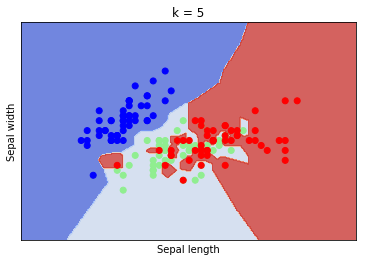

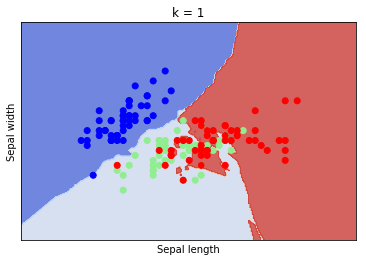

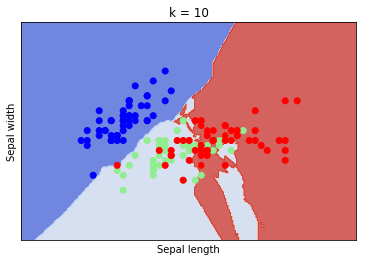

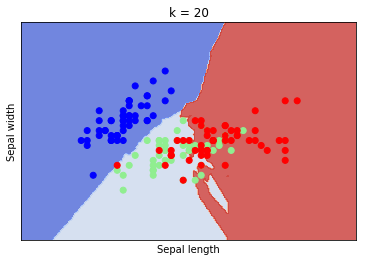

In [122]:
X = iris.data[:, :2] # Sepal length, sepal width
y = iris.target
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]

knn5.fit(X, y)
knn1.fit(X, y)
knn10.fit(X, y)
knn20.fit(X, y)

titles = ["k = 5", "k = 1", "k = 10", "k = 20"]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
for i, classifier in enumerate((knn1, knn5, knn10, knn20)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()